In [1]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'ConSTRain-analyses' directory
sys.path.append(os.environ["SRC_DIR"])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [4]:
df_repeats, df_calls = file_io.dfs_from_vcf(
    filename="../../data/banana/variants/v0.9.0/SAMEA5752290_merged.vcf", 
    samples=["SAMEA5752290"], 
    vcf_format="ConSTRain"
)

subset = ["genotype", "frequencies"]

df_calls = df_calls.dropna(subset=subset).assign(
    depth = lambda x: [sum(i.values()) for i in x["frequencies"]],
    depth_norm = lambda x: x["depth"] / x["copy_number"],
    n_distinct = lambda x: [len(set(i)) for i in x["genotype"]]
).reset_index(drop=True)

df_calls = df_calls.merge(df_repeats[["str_id", "chr", "start", "end", "period"]], on="str_id")

df_repeats.shape, df_calls.shape

((183345, 7), (153167, 12))

In [5]:
df_chr02 = df_calls.query("chr == 'chr02'").reset_index(drop=True)
df_chr02.shape

(11536, 12)

In [6]:
binsize = 2.5e5
cnv_lower, cnv_upper = 2.8e7, 3.375e7
print(cnv_upper - cnv_lower)
df_chr02.query(f"start >= {cnv_lower} and end <= {cnv_upper}").shape

5750000.0


(2703, 12)

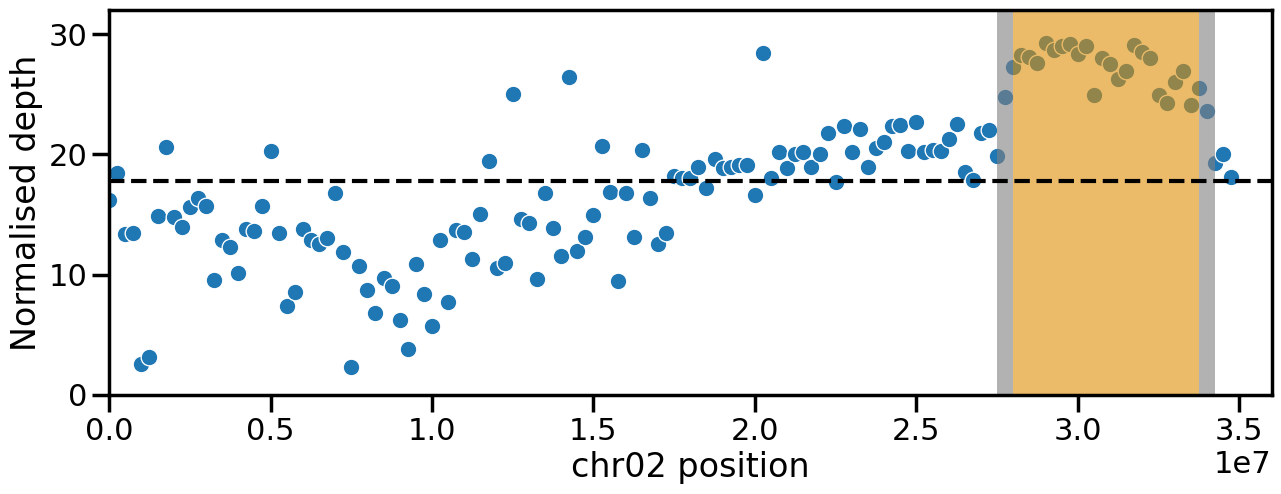

In [7]:
fig = plt.figure(figsize=(15, 5))


df_plot = (df_chr02
     .assign(bin = lambda x: x["start"] // binsize)[["bin", "depth_norm"]]
     .groupby("bin", as_index=False)
     .agg("mean")
     .assign(position = lambda x: x["bin"] * binsize))

ax = sns.scatterplot(
    df_plot,
    x="position",
    y="depth_norm"
)

ax.hlines(
    y = df_plot["depth_norm"].mean(),
    xmin = 0,
    xmax = ax.get_xlim()[1],
    color = "black",
    linestyle = "--"
)

ax.fill_between(
    [cnv_lower-5e5, cnv_lower], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_lower, cnv_upper], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color=sns.color_palette("colorblind")[1], 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_upper, cnv_upper+5e5], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)

_ = ax.set(
    xlabel="chr02 position",
    ylabel="Normalised depth",
    xlim=(0, 3.6e7),
    ylim=(0, 32)
)

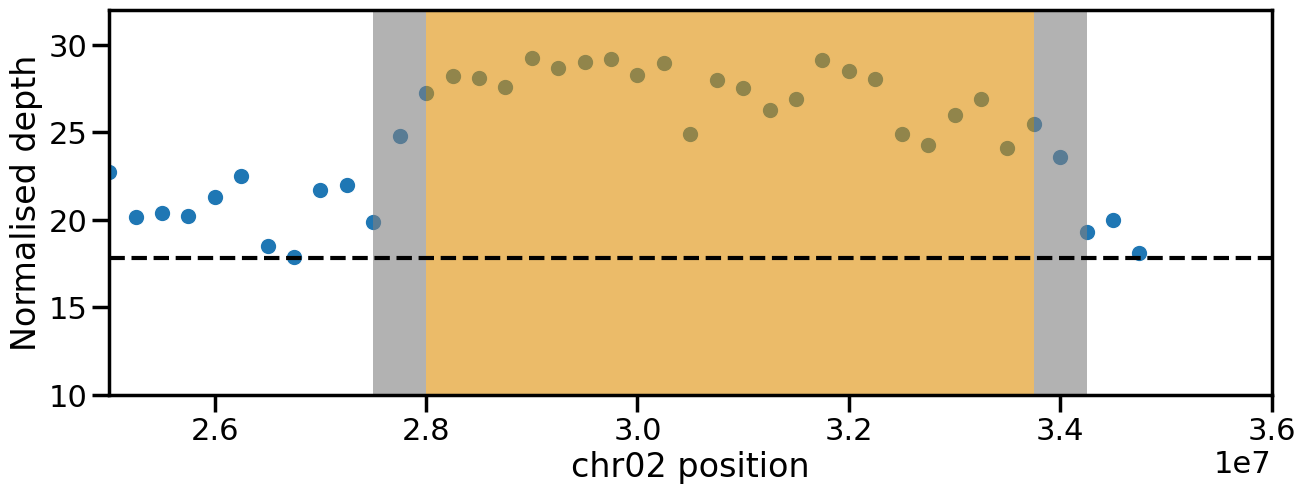

In [8]:
fig = plt.figure(figsize=(15, 5))

df_plot = (df_chr02
     .assign(bin = lambda x: x["start"] // binsize)[["bin", "depth_norm"]]
     .groupby("bin", as_index=False)
     .agg("mean")
     .assign(position = lambda x: x["bin"] * binsize))

ax = sns.scatterplot(
    df_plot,
    x="position",
    y="depth_norm"
)

ax.hlines(
    y = df_plot["depth_norm"].mean(),
    xmin = 0,
    xmax = ax.get_xlim()[1],
    color = "black",
    linestyle = "--"
)

ax.fill_between(
    [cnv_lower-5e5, cnv_lower], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_lower, cnv_upper], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color=sns.color_palette("colorblind")[1], 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_upper, cnv_upper+5e5], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)

_ = ax.set(
    xlabel="chr02 position",
    ylabel="Normalised depth",
    xlim=(2.5e7, 3.6e7),
    ylim=(10, 32)
)

In [12]:
df_repeats, df_calls_dup = file_io.dfs_from_vcf(
    filename="../../data/banana/variants/v0.9.1/2024-10-28_SAMEA5752290_merged_chr2_dup.vcf", 
    samples=["SAMEA5752290"], 
    vcf_format="ConSTRain"
)

subset = ["genotype", "frequencies"]

df_calls_dup = df_calls_dup.dropna(subset=subset).assign(
    depth = lambda x: [sum(i.values()) for i in x["frequencies"]],
    depth_norm = lambda x: x["depth"] / x["copy_number"],
    n_distinct = lambda x: [len(set(i)) for i in x["genotype"]]
).reset_index(drop=True)

df_calls_dup = df_calls_dup.merge(df_repeats[["str_id", "chr", "start", "end", "period"]], on="str_id")

df_repeats.shape, df_calls_dup.shape

((183345, 7), (152637, 12))

In [13]:
df_chr02_dup = df_calls_dup.query("chr == 'chr02'").reset_index(drop=True)
df_chr02_dup.shape

(11006, 12)

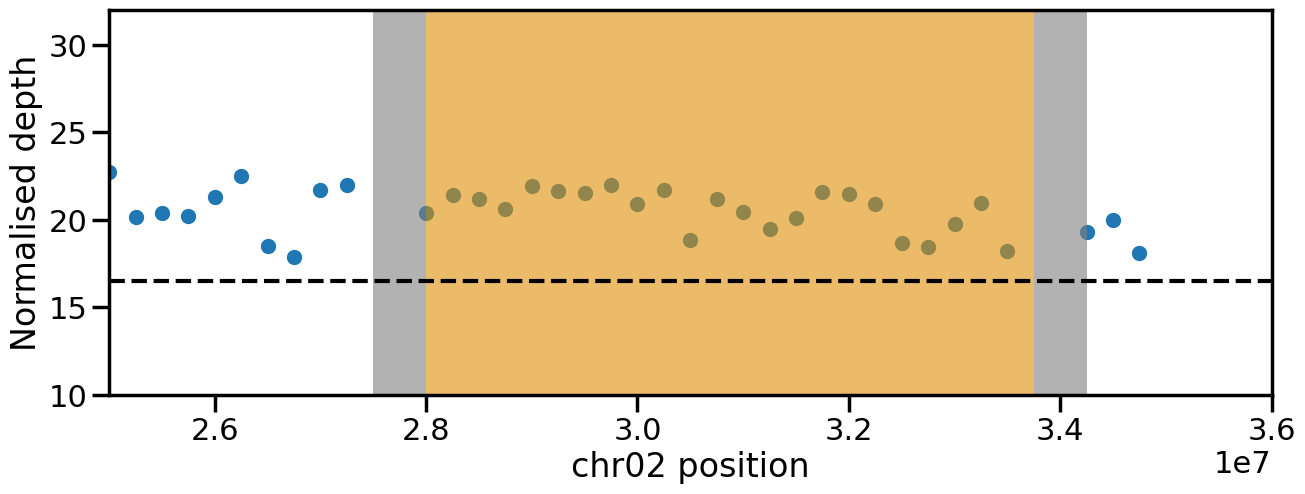

In [14]:
fig = plt.figure(figsize=(15, 5))

df_plot = (df_chr02_dup
     .assign(bin = lambda x: x["start"] // binsize)[["bin", "depth_norm"]]
     .groupby("bin", as_index=False)
     .agg("mean")
     .assign(position = lambda x: x["bin"] * binsize))

ax = sns.scatterplot(
    df_plot,
    x="position",
    y="depth_norm"
)

ax.hlines(
    y = df_plot["depth_norm"].mean(),
    xmin = 0,
    xmax = ax.get_xlim()[1],
    color = "black",
    linestyle = "--"
)


ax.fill_between(
    [cnv_lower-5e5, cnv_lower], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_lower, cnv_upper], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color=sns.color_palette("colorblind")[1], 
    alpha=0.6, 
    linewidth=0
)
ax.fill_between(
    [cnv_upper, cnv_upper+5e5], 
    ax.get_ylim()[0] - 50, 
    ax.get_ylim()[1] + 50, 
    color="grey", 
    alpha=0.6, 
    linewidth=0
)

_ = ax.set(
    xlabel="chr02 position",
    ylabel="Normalised depth",
    xlim=(2.5e7, 3.6e7),
    ylim=(10, 32)
)